# Практическая работа «Кластеризация. Метод k-средних»

## Цель практической работы

- Научиться строить модель кластеризации на реальных данных.

## Что входит в работу


- Загрузить данные и провести разведочный анализ.
- Предположить оптимальное количество кластеров.
- Построить модель кластеризации с помощью  библиотеки scikit-learn.
- Вычислить оптимальное количество кластеров.
- Интерпретировать результаты.

## Что оценивается

*   Выполнены все этапы задания.
*   Сделаны выводы по результатам.

## Как отправить работу на проверку

Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (с расширением .ipynb) или ссылку на него.


## Задача

Пусть имеется набор данных `Mall_Customers.csv` о покупателях супермаркета:

* CustomerID — идентификатор покупателя;
* Genre — пол;
* Age — возраст;
* Annual Income (k$) — годовой доход покупателя в тыс. долл.;
* Spending Score (1–100) — рейтинг трат покупателя.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы.

### Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других обнаруженных свойствах данных.

In [2]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Удалим столбец CustomerID, т.к. он не является информативным
df.drop(columns=['CustomerID'], inplace=True)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
# Посчитаем кол-во пропусков на каждом признаке
df.isna().sum() 

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Histogram for Genre


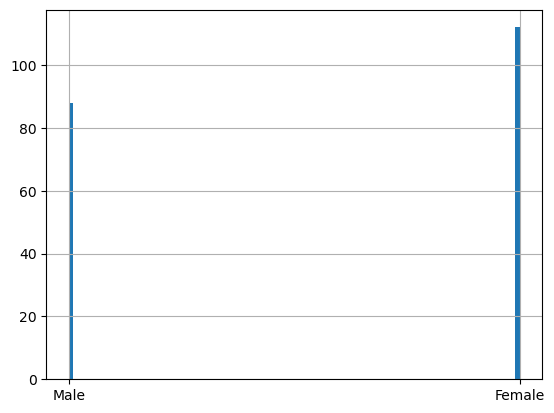

Histogram for Age


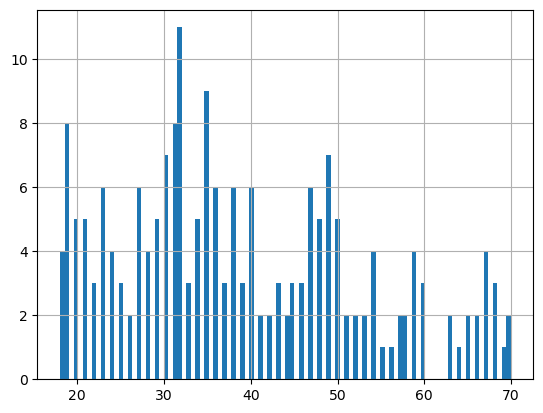

Histogram for Annual Income (k$)


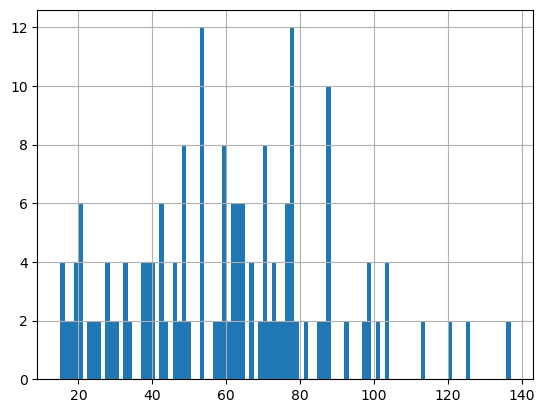

Histogram for Spending Score (1-100)


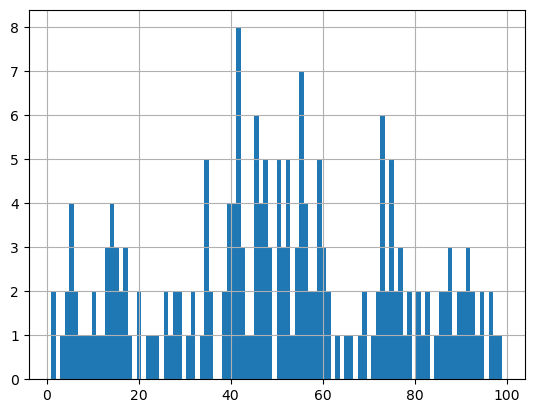

In [5]:
import matplotlib.pyplot as plt

for col in df.columns:
    print(f'Histogram for {col}')
    df[col].hist(bins=100)
    plt.show()

In [18]:
# Видимых аномалий и пропусков данных в датасете нет


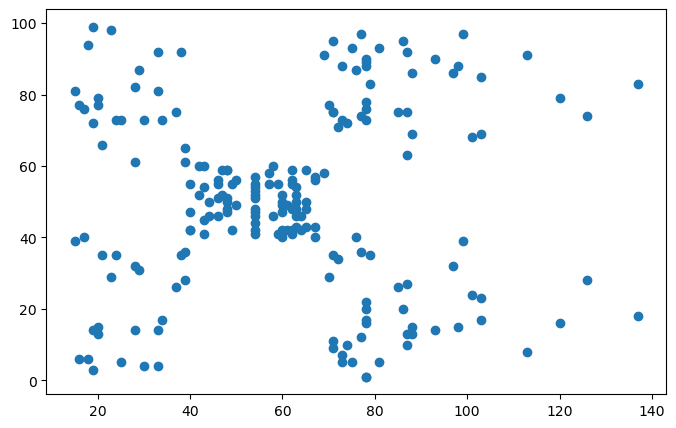

In [19]:
# Построим диаграмму зависимости рейтинга покупаеля от его дохода 
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.show()

### Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Поскольку данных может быть настолько много, что построение одной модели будет занимать несколько часов, важно примерно оценить количество кластеров до запуска обучения модели.

На основе результатов разведочного анализа данных предположите, какое количество кластеров будет оптимальным, и аргументируйте предположение.

На основании диаграммы выше я предпологаю, что кластеров здесь будет 5. Условно можно разделить на следущие типы: покупатели, которые 1. зарабатывают мало и тратят мало, 2. зарабатывают мало тратят много, 3. зарабатываю средне тратят средне, 4. зарабатывают много тратят мало, 5. зарабатывают много тратят много. Цель исследования может быть следующей, удержание клиентов 2 и 5 групп, и увелечение покупательского рейтинга группы 4.

### Задание 3

Преобразуйте категориальный признак Genre в численный. Аргументируйте выбор метода кодирования признака.

In [11]:
df.Genre = df.Genre.apply(lambda x: 1 if (x == 'Male') else 0)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


Поскольку у нас только два значения значения 'Male' и 'Female' я преобразовал в значения 1 и 0 соответственно.

### Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя.

In [42]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
x = df

km.fit(x)

points = km.predict(x)
km.inertia_

75412.59682443162

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

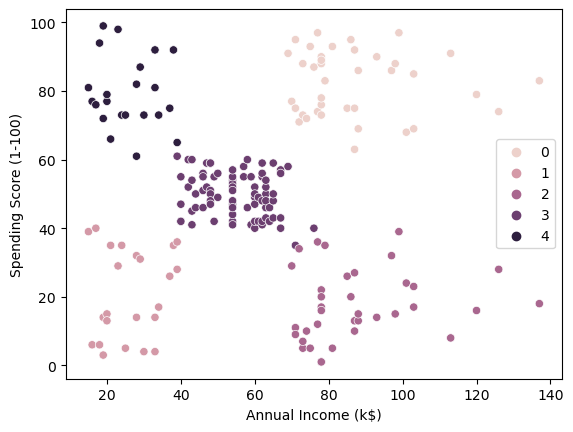

In [43]:
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=points)

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

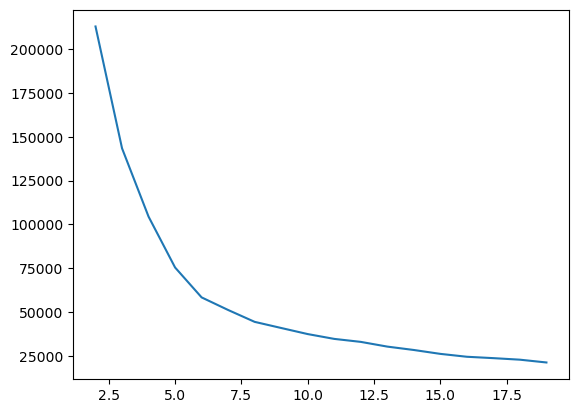

In [44]:
import seaborn as sns
n_clusters = list(range(2, 20))

metrics = []

for k in n_clusters:
    km2 = KMeans(n_clusters=k).fit(x)
    metrics.append(km2.inertia_)

sns.lineplot(n_clusters, metrics)

Четкой переломной линии здесь не видно, разбиение на 5 кластеров считаю наиболее оптимальмальным, для примера построим в следующем пункте модель для 6 кластеров

### Задание 5

Постройте финальную модель кластеризации с количеством кластеров, опредёленным в предыдущем задании.

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

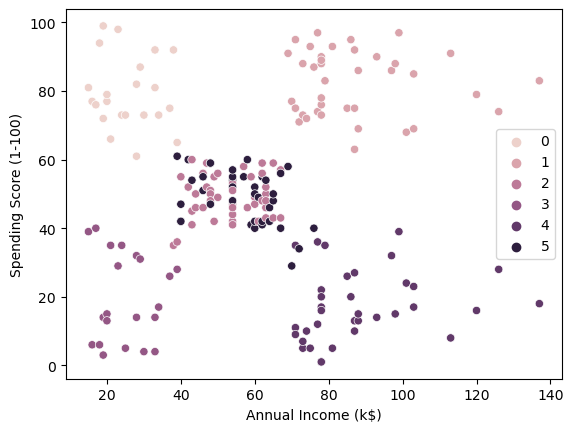

In [39]:
from sklearn.cluster import KMeans
km1 = KMeans(n_clusters=6)
x = df

km1.fit(x)

points1 = km1.predict(x)
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=points1)

Разбиение на 5 кластеров выглядит лучше

### Задание 6 (выполните по желанию)

При работе с данными важно не только качество моделей машинного обучения, но и интерпретация полученных результатов и представление их в виде, понятном пользователям и заказчикам.

После построения модели кластеризации вы разбили покупателей на группы. Теперь важно интерпретировать эти группы, то есть создать профиль группы. 

В качестве профиля группы часто используют её типичного представителя. В кластерах типичным представителем можно назвать центроиду кластера. В sklearn получить список центроид можно с помощью атрибута `cluster_centers_` у объекта класса KMeans (этот атрибут возвращает матрицу с размерностями (количество кластеров, количество признаков), подробнее об этом [в материале](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)). 

Получите центроиды кластеров, преобразуйте их к датафрейму, опишите типичного представителя каждой группы и чем группы отличаются друг от друга. При описании и сравнении используйте методы визуализации.

In [46]:
customers = pd.DataFrame(km.cluster_centers_, columns=df.columns)
customers

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.461538,32.692308,86.538462,82.128205
1,0.391304,45.217391,26.304348,20.913043
2,0.527778,40.666667,87.750000,17.583333
3,0.412500,42.937500,55.087500,49.712500
4,0.409091,25.272727,25.727273,79.363636


Типичный представитель группы 0: мужчина или женщина 33 лет, с высокими тратами и высоким доходом
Типичный представитель группы 1: мужчина или женщина(скорее женщина) 45 лет, с низкими тратами и низким доходом
Типичный представитель группы 2: мужчина или женщина 41 год, с низкими тратами и высоким доходом (целевая группа на мой взгляд)
Типичный представитель группы 3: мужчина или женщина(скорее женщина) 43 года, со средними тратами и средним доходом
Типичный представитель группы 4: мужчина или женщина(скорее женщина) 25 лет, с высокими тратами и низким доходом

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

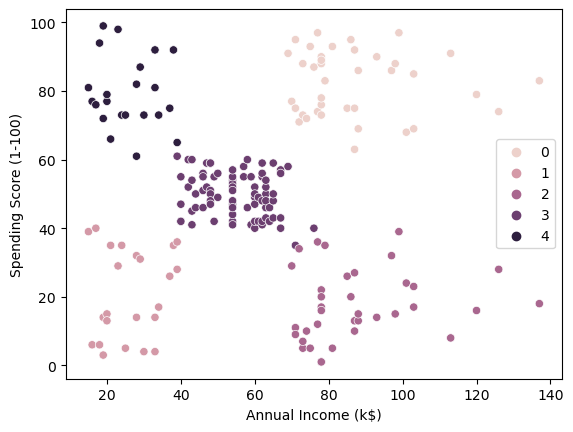

In [47]:
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=points)